# Single molecule - Manual Pipeline

____
This code is intended to take a video (.tiff) from fluorescence microscopy, segment the cell,detect single-RNA spots, track the single-RNA spots in time, and quantify spot intensity.
____
The code is divided in the following sections:

* Alignment images taken from the two cameras.
* Load microscope video.
* Mask selection. Manual selection of a Region Of Interest (ROI).
* Particle tracking using trackpy. 
____

## Loading libraries and images
___

In [1]:
from skimage.io import imread
import numpy as np 
import pathlib
import sys
import trackpy as tp
import matplotlib.pyplot as plt 
import cv2
import trackpy as tp
import ipywidgets as widgets                       # Library to plot widgets
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.


In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
video_dir = current_dir.parents[1].joinpath('DataBases','test_videos','ran_short','MAX_Cell01.tif')
beads_dir = current_dir.parents[1].joinpath('DataBases','test_videos','ran_short_beads','Beads01.tif')

In [3]:
# Importing rSNAPed
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [4]:
# Loading images
image_with_beads = imread(beads_dir)
video = imread(video_dir)

# Video registration
___

The dimensions in the image with beads are:  (2, 512, 512) 



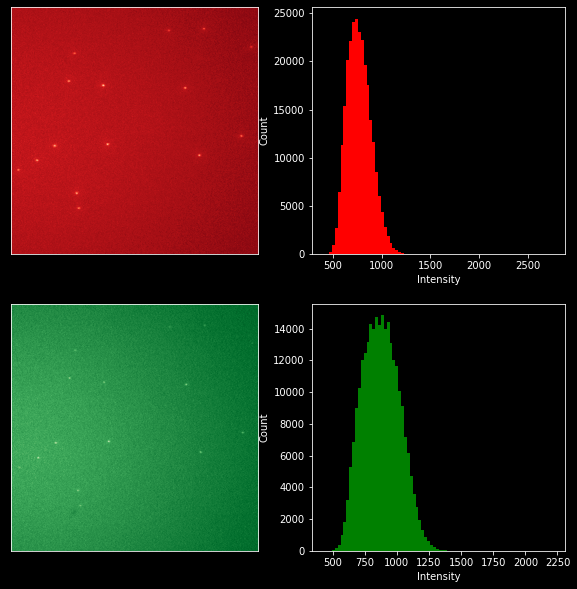

In [5]:
# Visualizing images with beads
print('The dimensions in the image with beads are: ', image_with_beads.shape, '\n')
# Visualizing the beads
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0,0].imshow(image_with_beads[0,:,:],cmap=plt.cm.Reds_r)
ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
ax[0,1].hist(image_with_beads[0,:,:].flatten(), bins=80,color='red')
ax[0,1].set_xlabel('Intensity'); ax[0,1].set_ylabel('Count')
ax[1,0].imshow(image_with_beads[1,:,:],cmap=plt.cm.Greens_r)
ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
ax[1,1].hist(image_with_beads[1,:,:].flatten(), bins=80,color='green')
ax[1,1].set_xlabel('Intensity'); ax[1,1].set_ylabel('Count')
plt.show()

Calculating the homography matrix between the two images.
_______ 
 # Spots in first image :  15   # Spots in second image :  15 

Spots detected in the first image: 
[[398.   46.2]
 [325.8  49.9]
 [495.2  84. ]]
Spots detected in the second image:
[[399.8  45.2]
 [327.   48.9]
 [497.9  82.2]]
_______ 

Calculated homography matrix: 
<ProjectiveTransform(matrix=
    [[ 1.00210923e+00,  4.77591446e-03,  4.86913219e-01],
     [-3.70293848e-03,  1.00283223e+00, -7.98277449e-02],
     [-1.11839285e-06, -7.70592521e-07,  1.00000000e+00]])>


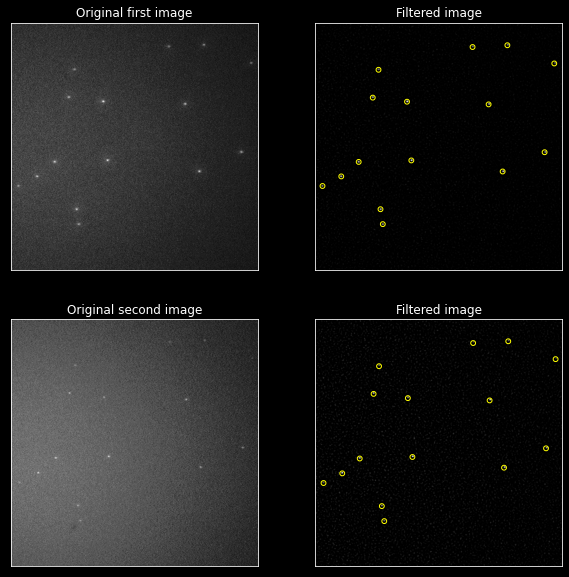

In [6]:
# Calculating the homography matrix
homography_matrix = rsp.BeadsAlignment(first_image_beads= image_with_beads[0,:,:] ,second_image_beads = image_with_beads[1,:,:], spot_size = 5, min_intensity = 300).make_beads_alignment()

The dimensions in the video are:  (5, 512, 512, 3) 



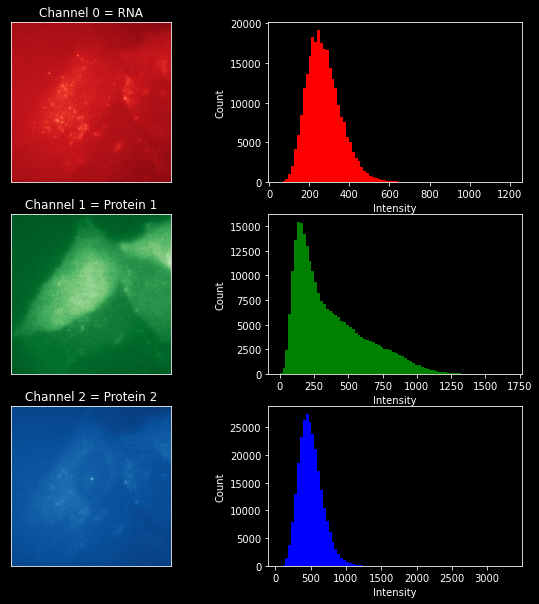

In [7]:
# Loading images with the cells
print('The dimensions in the video are: ', video.shape, '\n')
# Plotting the beads
selected_time_point = 0
fig, ax = plt.subplots(3,2, figsize=(10, 10))
ax[0,0].imshow(video[selected_time_point,:,:,0],cmap=plt.cm.Reds_r)
ax[0,0].set_title('Channel 0 = RNA');ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
ax[0,1].hist(video[selected_time_point,:,:,0].flatten(), bins=80,color='red')
ax[0,1].set_xlabel('Intensity'); ax[0,1].set_ylabel('Count')
ax[1,0].imshow(video[selected_time_point,:,:,1],cmap=plt.cm.Greens_r)
ax[1,0].set_title('Channel 1 = Protein 1'); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
ax[1,1].hist(video[selected_time_point,:,:,1].flatten(), bins=80,color='green')
ax[1,1].set_xlabel('Intensity'); ax[1,1].set_ylabel('Count')
ax[2,0].imshow(video[selected_time_point,:,:,2],cmap=plt.cm.Blues_r)
ax[2,0].set_title('Channel 2 = Protein 2'); ax[2,0].set_xticks([]); ax[2,0].set_yticks([])
ax[2,1].hist(video[selected_time_point,:,:,2].flatten(), bins=80,color='blue')
ax[2,1].set_xlabel('Intensity'); ax[2,1].set_ylabel('Count')
plt.show()

In [8]:
# Applying the alignment transformation to the whole video. Matrix multiplication to align the images from the two cameras.
transformed_video = rsp.CamerasAlignment(video, homography_matrix, target_channels= [1,2]).make_video_alignment()

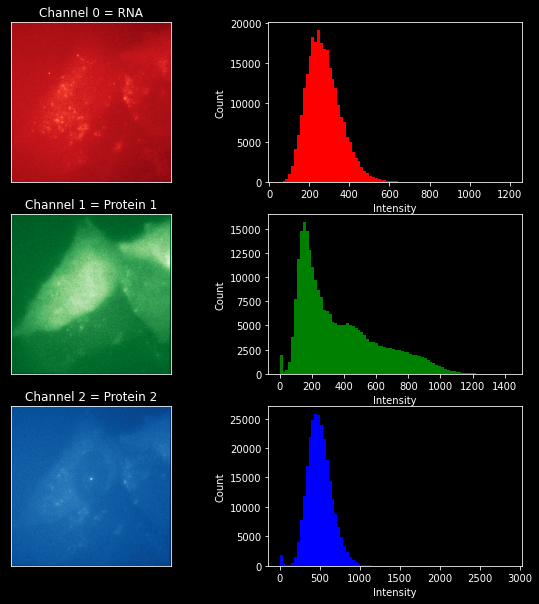

In [9]:
# Plotting the beads
selected_time_point = 0
fig, ax = plt.subplots(3,2, figsize=(10, 10))
ax[0,0].imshow(transformed_video[selected_time_point,:,:,0],cmap=plt.cm.Reds_r)
ax[0,0].set_title('Channel 0 = RNA');ax[0,0].set_xticks([]); ax[0,0].set_yticks([])
ax[0,1].hist(transformed_video[selected_time_point,:,:,0].flatten(), bins=80,color='red')
ax[0,1].set_xlabel('Intensity'); ax[0,1].set_ylabel('Count')
ax[1,0].imshow(transformed_video[selected_time_point,:,:,1],cmap=plt.cm.Greens_r)
ax[1,0].set_title('Channel 1 = Protein 1'); ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
ax[1,1].hist(transformed_video[selected_time_point,:,:,1].flatten(), bins=80,color='green')
ax[1,1].set_xlabel('Intensity'); ax[1,1].set_ylabel('Count')
ax[2,0].imshow(transformed_video[selected_time_point,:,:,2],cmap=plt.cm.Blues_r)
ax[2,0].set_title('Channel 2 = Protein 2'); ax[2,0].set_xticks([]); ax[2,0].set_yticks([])
ax[2,1].hist(transformed_video[selected_time_point,:,:,2].flatten(), bins=80,color='blue')
ax[2,1].set_xlabel('Intensity'); ax[2,1].set_ylabel('Count')
plt.show()

# Selecting a region of interest (a.k.a. Mask) in the image
____

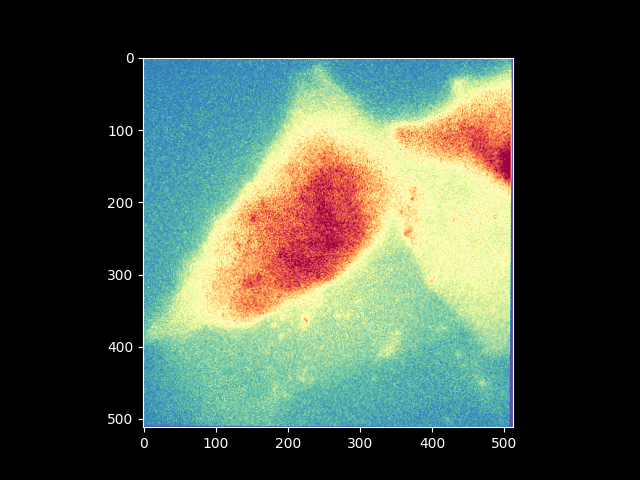

In [10]:
###########
# Magic function to interact with the figure.
%matplotlib widget 
###########
# Selecting the first time point and first channel
on1= rsp.ManualMask(video=transformed_video,time_point_selected=0,selected_channel=1)  # NOTICE THAT FOR THE MASK SELECTION WE USE THE CHANNEL 1 (GREEN CHANNEL)

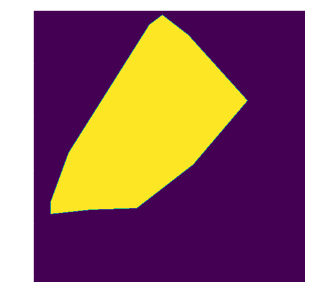

In [11]:
###########
# Magic function to have the figure as an output in the notebook
%matplotlib inline 
###########
arr = np.array([on1.selected_points],'int')
mask = cv2.fillPoly(np.zeros(video[0,:,:,1].shape,np.uint8),arr,[1,1,1])
plt.figure( figsize=(5, 5))
plt.imshow(mask)
plt.show()

# Particle tracking using Trackpy

____


The particle tracking is performed using [trackpy](http://http://soft-matter.github.io/trackpy/v0.5.0/)
The library documentation can be accessed in the following [link](https://buildmedia.readthedocs.org/media/pdf/trackpy/v0.2.3/trackpy.pdf).

### Calculating the intensity of the detected particles.

All particles of size:  7


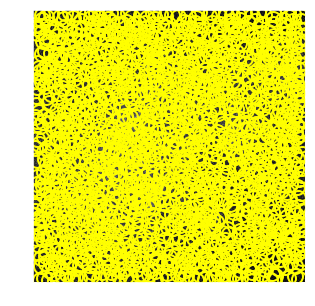

Intensity distribution for all particles of size:  7


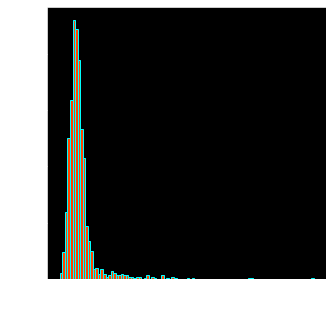

In [12]:
# This section generates an histogram with the intensity of the detected particles in the video.
particle_size = 7 # according to the documentation must be an odd number 3,5,7,9 etc.
minimal_intensity_for_selection = 0 # minimal intensity to detect a particle.
selected_channel_for_tracking = 0

# "f" is a pandas data frame that contains the information about the detected spots
f = tp.locate(transformed_video[0,:,:,selected_channel_for_tracking], particle_size, minmass=minimal_intensity_for_selection) 
print('All particles of size: ',  str(particle_size))
plt.figure( figsize=(5,5))
tp.annotate(f,transformed_video[0,:,:,selected_channel_for_tracking],color='yellow')
plt.show()

print('Intensity distribution for all particles of size: ',  str(particle_size))
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(f['mass'], bins=100, color = "orangered", ec="cyan")
ax.set(xlabel="Particle's 'mass' ", ylabel='count')
plt.show()

### Select an intensity threshold value and particle size

In the following widget, the user is asked to manually input the particle size and the Intensity threshold, these numbers will be used for during the rest of the code to calculate intensities. Notice that tracking is only performed on channel 0.

In [13]:
# To start visualization move the time slider.
plt.rcParams["figure.figsize"] = (5,5) # if movie is too big, change size to (7,7)
def figure_viewer_tr(time,mass_text, particle_size):
    ch = 0  
    f = tp.locate(transformed_video[time,:,:,ch],particle_size, minmass=mass_text, maxsize=7, percentile=60) # "f" is a pandas data frame that contains the information about the detected spots
    tp.annotate(f,transformed_video[time,:,:,ch]) # tp.annotate is a trackpy function that displays the image with the detected spots  
values_size=[3,5,7,9] # Notice value must be an odd number.
interactive_plot_tr = interactive(figure_viewer_tr, mass_text = widgets.IntSlider(value=400,min=100,max=2000,description='min Intensity'), particle_size = widgets.IntSlider(min=3,max=11,step=2,value=7,description='Particle Size'), time = widgets.IntSlider(min=0,max=video.shape[0]-1,step=1,value=0,description='Time'))
controls = HBox(interactive_plot_tr.children[:-1], layout = Layout(flex_flow='row wrap'))
output = interactive_plot_tr.children[-1]
display(VBox([controls, output])) 

### Saving the threshold parameters that will be used to define the spot selection criteria

In [14]:
# This section saves the parameters adjusted in the previous widget in two variables that will be use for the rest of the code.
selected_intensity = interactive_plot_tr.kwargs_widgets[1].value
selected_size = interactive_plot_tr.kwargs_widgets[2].value

### Detecting the spots in all frames

In [15]:
# "f" is a pandas data frame that contains the information about the detected spots.
# tp.batch is a trackpy function that detects spots for multiple frames in a video.
f = tp.batch(video[:,:,:,0],selected_size, minmass=selected_intensity,percentile=70)
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,106.465342,213.124241,2019.520218,1.582470,0.084034,195.042816,16295.0,0.064531,0
1,120.273060,230.108106,1059.027657,1.518357,0.081020,134.355149,13237.0,0.094619,0
2,121.713286,270.973551,682.198302,1.479183,0.138450,86.085162,11000.0,0.143599,0
3,163.604669,122.106358,2699.423899,1.493031,0.076147,301.963877,16510.0,0.063119,0
4,175.109262,221.313160,693.371910,1.476762,0.267475,89.868062,13459.0,0.091521,0
...,...,...,...,...,...,...,...,...,...
215,352.682834,152.661265,1074.842296,1.607486,0.319491,111.420992,13483.0,0.079595,4
216,357.755326,166.003893,1134.035700,1.417405,0.114202,145.892848,13228.0,0.082652,4
217,363.521765,221.474016,696.902146,1.836882,0.052627,58.414844,14120.0,0.072861,4
218,386.659824,193.044463,947.721885,1.889446,0.387736,66.695051,13182.0,0.083229,4


### Removing particles outside the mask

In [17]:
def spots_in_mask(f,mask):
    # extracting the contours in the image
    coords = np.array([f.y, f.x]).T # These are the points detected by trackpy
    coords_int = np.round(coords).astype(int)  # or np.floor, depends
    values_at_coords = mask[tuple(coords_int.T)] # If 1 the value is in the mask
    f['In Mask']=values_at_coords # Check if pts are on/in polygon mask  
    return f 

In [18]:
f1 = spots_in_mask(f,mask) 
f1

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,In Mask
0,106.465342,213.124241,2019.520218,1.582470,0.084034,195.042816,16295.0,0.064531,0,1
1,120.273060,230.108106,1059.027657,1.518357,0.081020,134.355149,13237.0,0.094619,0,1
2,121.713286,270.973551,682.198302,1.479183,0.138450,86.085162,11000.0,0.143599,0,1
3,163.604669,122.106358,2699.423899,1.493031,0.076147,301.963877,16510.0,0.063119,0,0
4,175.109262,221.313160,693.371910,1.476762,0.267475,89.868062,13459.0,0.091521,0,1
...,...,...,...,...,...,...,...,...,...,...
215,352.682834,152.661265,1074.842296,1.607486,0.319491,111.420992,13483.0,0.079595,4,1
216,357.755326,166.003893,1134.035700,1.417405,0.114202,145.892848,13228.0,0.082652,4,1
217,363.521765,221.474016,696.902146,1.836882,0.052627,58.414844,14120.0,0.072861,4,0
218,386.659824,193.044463,947.721885,1.889446,0.387736,66.695051,13182.0,0.083229,4,0


In [19]:
dataframe_particles_in_mask = f[f['In Mask']==True]
dataframe_particles_in_mask

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,In Mask
0,106.465342,213.124241,2019.520218,1.582470,0.084034,195.042816,16295.0,0.064531,0,1
1,120.273060,230.108106,1059.027657,1.518357,0.081020,134.355149,13237.0,0.094619,0,1
2,121.713286,270.973551,682.198302,1.479183,0.138450,86.085162,11000.0,0.143599,0,1
4,175.109262,221.313160,693.371910,1.476762,0.267475,89.868062,13459.0,0.091521,0,1
5,176.410977,165.202473,1442.293931,1.518251,0.227730,165.581352,15146.0,0.073287,0,1
...,...,...,...,...,...,...,...,...,...,...
212,343.888318,226.678903,836.630637,1.860674,0.257805,56.459287,14871.0,0.066253,4,1
213,345.075172,212.585084,1019.440934,1.781987,0.179061,90.363253,14367.0,0.070547,4,1
214,352.061046,123.897008,842.121769,1.632459,0.367847,84.047764,13187.0,0.083166,4,1
215,352.682834,152.661265,1074.842296,1.607486,0.319491,111.420992,13483.0,0.079595,4,1


### Linking all detected spots across all frames

In [20]:
# tp.link_df is a trackpy function that links spots detected in multiple frames, this generates the spots trajectories in time.
df_linked_particles = tp.link_df(dataframe_particles_in_mask,5, memory=2) # tp.link_df(data_frame, max_distance_particle_moves, max_time_particle_vanishes).

### Eliminating spurious trajectories. 

In [21]:
#trackpy.filtering.filter_stubs(tracks, threshold=100)
df_linked_particles_filtered = tp.filter_stubs(df_linked_particles, 2)  # selecting trajectories that appear in at least 10 frames.
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', df_linked_particles['particle'].nunique())
print('After:', df_linked_particles_filtered['particle'].nunique())

Before: 103
After: 41


In [22]:
# Optional section that saves the particles trajectories and intensities as a CSV file
df_linked_particles_filtered.to_csv('tracking_particles.csv', index = False)

## Working with trajectories
____

In [23]:
# Extracting the intensity values for particles with intensity higher than a threshold and in frame 0
df_linked_particles_filtered.loc[(df_linked_particles_filtered['mass']>=1000) & (df_linked_particles_filtered['frame']==0)  ]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,In Mask,particle
frame,,,,,,,,,,,
0,106.465342,213.124241,2019.520218,1.582470,0.084034,195.042816,16295.0,0.064531,0,1,0
0,351.997177,102.740615,1144.205108,1.578092,0.264824,113.404058,13977.0,0.085026,0,1,12
0,286.755464,203.367686,1391.766185,1.695390,0.055303,123.642308,16485.0,0.063280,0,1,19
0,120.273060,230.108106,1059.027657,1.518357,0.081020,134.355149,13237.0,0.094619,0,1,20
0,176.410977,165.202473,1442.293931,1.518251,0.227730,165.581352,15146.0,0.073287,0,1,23
0,196.813399,373.218232,1194.949415,1.765836,0.122530,94.268390,15373.0,0.071374,0,1,25
0,202.869282,163.850540,1244.468081,1.764147,0.178769,103.704905,18062.0,0.054514,0,1,28
0,272.367410,106.848541,1036.597503,1.614008,0.135569,109.082060,13741.0,0.087867,0,1,33


### Plotting trajectories in x-y.

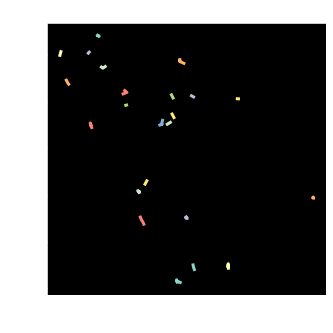

In [24]:
# Plotting 
plt.figure(figsize=(5,5))
for i in range(0,df_linked_particles_filtered['particle'].nunique() ):
    x_val = df_linked_particles_filtered.loc[df_linked_particles_filtered['particle']==i ].x.values[:]
    y_val = df_linked_particles_filtered.loc[df_linked_particles_filtered['particle']==i ].y.values[:]
    plt.plot(x_val,y_val, '-',linewidth = 3 )
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Particle movement 2D')
plt.show()

### Plotting trajectories versus intensity using trackpy

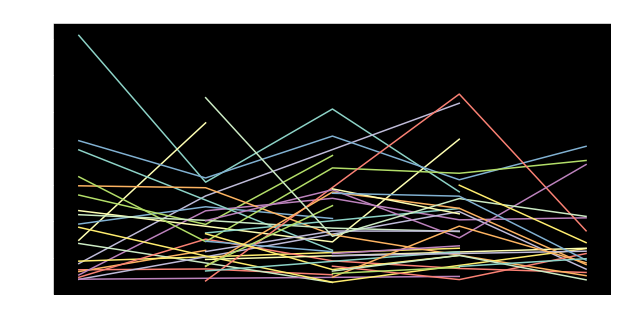

In [25]:
# Defining the number of detected spots.
n_particles = df_linked_particles_filtered['particle'].nunique()

# Plotting
plt.figure(figsize=(10,5))
for id in range(0,n_particles):
    plt.plot(df_linked_particles_filtered.loc[df_linked_particles_filtered['particle']==df_linked_particles_filtered['particle'].unique()[id]].frame, df_linked_particles_filtered.loc[df_linked_particles_filtered['particle']==df_linked_particles_filtered['particle'].unique()[id]].mass )
plt.xlabel('Time (sec)')
plt.ylabel('Intensity a.u.')
plt.title('Intensity vs Time')
plt.show()